![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [3]:
df.shape

(541462, 3)

<Axes: >

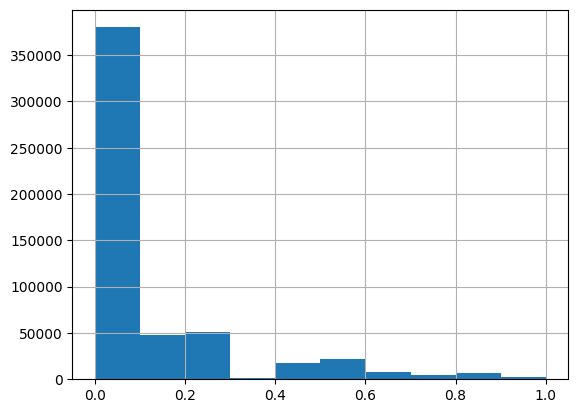

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 1
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [24]:
model = LinearRegression()
model.fit(X_train_counts, y_train)
model

LinearRegression()

In [26]:
y_pred = model.predict(X_test_counts)
mse = mean_squared_error(y_test, y_pred)
print("El MSE del modelo es:", mse)

El MSE del modelo es: 0.03719261246682414


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 2
vectorizer = CountVectorizer( ngram_range=(1, 3))
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(X_train_counts, y_train)
model

LinearRegression()

In [13]:
y_pred = model.predict(X_test_counts)
mse = mean_squared_error(y_test, y_pred)
print("El MSE del modelo es:", mse)

El MSE del modelo es: 0.05399097023799517


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.



TfidfVectorizer es una técnica de procesamiento de texto que convierte una colección de documentos de texto en una matriz de características TF-IDF. TF-IDF significa "Term Frequency-Inverse Document Frequency", que son dos medidas combinadas en una sola que describen la importancia de una palabra en un documento en relación con una colección de documentos o corpus.

Term Frequency (TF): Es la frecuencia relativa con la que una palabra aparece en un documento en comparación con el total de palabras en ese documento. Esto ayuda a entender la importancia de la palabra dentro del documento específico.

Inverse Document Frequency (IDF): Mide la importancia general de la palabra considerando cuán frecuentemente aparece en todos los documentos del corpus. Esto disminuye la importancia de las palabras que aparecen muy frecuentemente en el corpus (como preposiciones) y que, por lo tanto, son menos informativas.

TF-IDF Weight: El peso TF-IDF de cada palabra es el producto de su TF y su IDF. Este peso es alto para palabras que son muy típicas para un documento, pero no comunes en todo el corpus, lo que las hace buenas para distinguir entre documentos.

Ventajas de TfidfVectorizer sobre CountVectorizer

Relevancia sobre frecuencia: TfidfVectorizer no solo cuenta la frecuencia de las palabras, sino que también considera cuánto de únicas son estas palabras entre todos los documentos (corpus). Esto ayuda a resaltar las palabras más importantes y no simplemente las más frecuentes. Mejor manejo de palabras comunes: Al penalizar las palabras que aparecen en muchos documentos, ayuda a evitar que palabras comunes pero poco informativas dominen el análisis. Mejora en la clasificación de documentos: Al enfocarse en palabras distintivas de cada documento, TF-IDF puede mejorar el desempeño en tareas como clasificación de texto y clustering. Desventajas de TfidfVectorizer en comparación con CountVectorizer Complejidad y costo computacional: Calcular IDF requiere un paso adicional de recorrer todos los documentos para contar cuántas veces aparece cada palabra, lo que puede ser computacionalmente costoso especialmente para grandes corpus. Sensibilidad a documentos no representativos: Si el conjunto de entrenamiento no es representativo del uso general del lenguaje, las puntuaciones IDF podrían no reflejar la verdadera importancia de las palabras. No captura relaciones de palabras: Al igual que CountVectorizer, TfidfVectorizer no captura la posición ni la relación entre palabras (contexto), por lo que podría ser menos efectivo en algunos casos que requieren un análisis más profundo del texto.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [ ]:
# Celda 5